In [2]:
import numpy as np
import sympy as sp
from sympy import Symbol
from sympy import solve, Poly, Eq, Function, exp
import math
import matplotlib.pyplot as plt
from numpy.lib.scimath import sqrt as csqrt
from scipy.signal import find_peaks
import os
import imp
import matplotlib.pyplot as plt
import sys
os.add_dll_directory('C:\\Program Files\\Lumerical\\v202\\api\\python\\')
lumapi = imp.load_source('lumapi','C:\\Program Files\\Lumerical\\v202\\api\\python\\lumapi.py') 

Parameters

In [10]:
L = 1.5e-3 #length
r_max_1 = 0.85 ## maximum reflection
r_max_2 = 0.95
lambda_d = 1550e-9 ## ressonance wavelength
neff = 1.447
lambda_min = lambda_d - 2e-9
lambda_max = lambda_d + 2e-9
lambd = np.linspace(lambda_min, lambda_max, 10000)

In [11]:
sigma = 0 ## DC coupling coefficient
neff = 1.447
kappa_1 = (1/L)*np.arctanh(np.sqrt(r_max_1))
kappa_2 = (1/L)*np.arctanh(np.sqrt(r_max_2))
a_c_1 = kappa_1*lambda_d/(np.pi)
a_c_2 = kappa_2*lambda_d/(np.pi) ## AC part of the induced index
d_c = sigma*lambda_d/(2*np.pi)
wave_max = (1 + d_c/neff)*lambda_d


Reflectivity x normalized frequency

In [112]:
def reflectivity(sigma, kappa, L):
    r = np.sinh(csqrt(kappa**2-sigma**2)*L)**2/((np.cosh(csqrt(kappa**2-sigma**2)*L)**2) - sigma**2/kappa**2)
    return r

In [13]:
sigma_c = 2*np.pi*neff*((1/lambd) - (1/lambda_d))
r1 = reflectivity(sigma_c, kappa_1, L)
r2 = reflectivity(sigma_c, kappa_2, L)

In [14]:
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 16}

In [1]:
figure, ax = plt.subplots(1, 2, figsize=(18,6))
plt.rc('font', **font)
plt.rc('axes', linewidth=2)

ax[0].plot(lambd/wave_max,r1,linewidth = 2, label = '$\kappa$'+'L = '+str(round(kappa_1*L, 3)))
ax[0].plot(lambd/wave_max,r2,linewidth = 2, label = '$\kappa$'+'L = '+str(round(kappa_2*L, 3)))
#ax[0].plot(lambd/wave_max,1 - r,linewidth = 2, label = '$\kappa$'+'L = '+str(round(kappa*L, 3)))
ax[0].grid(True)
#ax[0].set_ylim([0, 1])
ax[0].set_xlabel('$\lambda/\lambda_d$')
ax[0].set_ylabel('Reflectivity')
ax[0].legend(loc = 'upper right',framealpha = 1, fontsize = 14)

ax[1].plot(lambd/wave_max,10*np.log10(r1),linewidth = 2, label = '$\kappa$'+'L = '+str(round(kappa_1*L, 3)))
ax[1].plot(lambd/wave_max,10*np.log10(r2),linewidth = 2, label = '$\kappa$'+'L = '+str(round(kappa_2*L, 3)))
ax[1].axhline(y = 10*np.log10(0.5), color = 'black')
ax[1].grid(True)
ax[1].set_ylim([-20, 0])
ax[1].set_xlabel('$\lambda/\lambda_d$')
ax[1].set_ylabel('Reflectivity - dB')
ax[1].legend(loc = 'upper right',framealpha = 1, fontsize = 14)

NameError: name 'plt' is not defined

## BANDEDGE and FWHM

In [26]:
print(kappa_1) ## length = 1.5 mm
print(kappa_2) ## length = 1.5 mm

1067.9350674777002
1452.1814735339167


In [19]:
dlam_lam = (a_c_1/neff)*np.sqrt(1 + (lambda_d/(a_c_1*L))**2)
lambda_right = lambda_d + lambda_d*dlam_lam/2
lambda_left = lambda_d - lambda_d*dlam_lam/2
bandwidth = np.linspace(lambda_left, lambda_right, 1000)
band = lambda_right - lambda_left
sigma_bandwidth = 2*np.pi*neff*((1/bandwidth) - (1/lambda_d))
r1_bandwidth = reflectivity(sigma_bandwidth, kappa_1, L)

c:\Users\moise\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


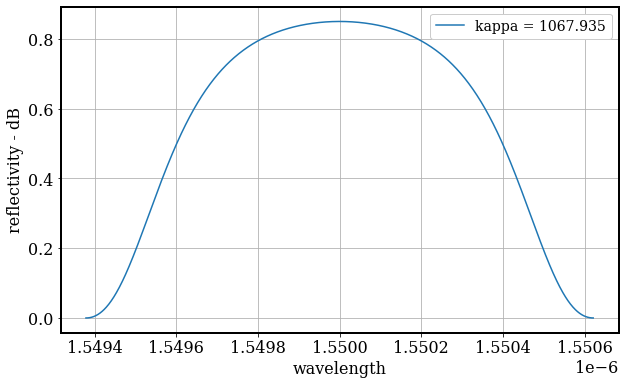

In [193]:
figure = plt.figure(figsize=(10,6))
plt.rc('font', **font)
plt.rc('axes', linewidth=2)

plt.plot(bandwidth, r1_bandwidth, label = 'kappa = ' + str(round(kappa_1, 3)))
plt.grid(True)
plt.xlabel('wavelength')
plt.ylabel('reflectivity - dB')
plt.legend(loc = 'upper right', framealpha = 1, fontsize = 14)

## FWHM

In [188]:
for i in range(len(bandwidth)):
    if r1_bandwidth[i] < r_max_1/2 and r1_bandwidth[i + 1] > r_max_1/2:
        min_index = 1
        break

for j in range (min_index, len(bandwidth)):
    if r1_bandwidth[j] > r_max_1/2 and r1_bandwidth[j + 1] < r_max_1/2:
        max_index = j
        break

fwhm = bandwidth[j] - bandwidth[i]
print('FWHM = ', round(fwhm, 13))

FWHM =  8.507e-10


c:\Users\moise\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


(-40.0, 0.0)

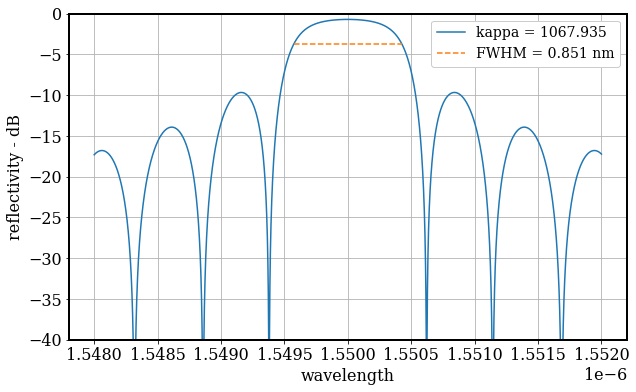

In [194]:
figure = plt.figure(figsize=(10,6))
plt.rc('font', **font)
plt.rc('axes', linewidth=2)

half_height = 10*np.log10(r_max_1/2)
plt.plot(lambd, 10*np.log10(r1), label = 'kappa = ' + str(round(kappa_1, 3)))
plt.plot([bandwidth[i],bandwidth[j]], [half_height, half_height], '--', label ='FWHM = ' + str(round(fwhm*1e9, 3)) + ' nm')
plt.grid(True)
plt.xlabel('wavelength')
plt.ylabel('reflectivity - dB')
plt.legend(loc = 'upper right', framealpha = 1, fontsize = 14)
plt.ylim([-40,0])

## INTERCONNECT

In [180]:
inter = lumapi.INTERCONNECT(filename= 'fbg.icp')

Exception ignored in: <function Lumerical.__del__ at 0x0000017C0A131C10>
Traceback (most recent call last):
  File "C:\Program Files\Lumerical\v202\api\python\lumapi.py", line 1179, in __del__
    close(self.handle)
  File "C:\Program Files\Lumerical\v202\api\python\lumapi.py", line 252, in close
    iapi.appClose(handle)
ctypes.ArgumentError: argument 1: <class 'TypeError'>: expected Session instance instead of Session


In [78]:
inter.switchtolayout()
inter.run()

In [100]:
result_ona_1 = inter.getresult('ONA_1','input 1/mode 1/gain')
result_ona_2 = inter.getresult('ONA_2','input 1/mode 1/gain')
result_ona_3 = inter.getresult('ONA_3','input 1/mode 1/gain')

In [101]:
wavelength = result_ona_1['wavelength']
gain_ona_1 = result_ona_1['TE gain (dB)']
gain_ona_2 = result_ona_2['TE gain (dB)']
gain_ona_3 = result_ona_3['TE gain (dB)']

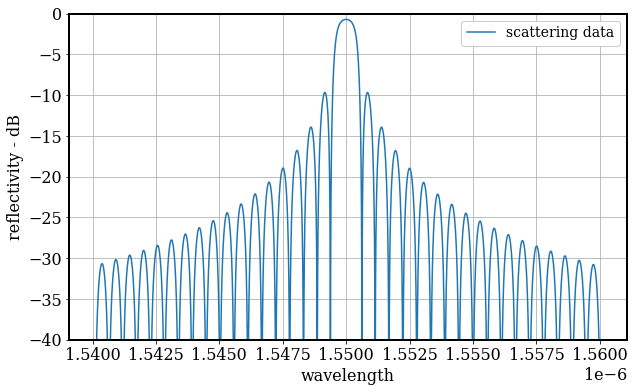

In [102]:
figure = plt.figure(figsize=(10,6))
plt.rc('font', **font)
plt.rc('axes', linewidth=2)
plt.plot(wavelength, gain_ona_1, label = 'scattering data')
plt.grid(True)
plt.xlabel('wavelength')
plt.ylabel('reflectivity - dB')
plt.ylim([-40, 0])
plt.legend(loc = 'upper right', framealpha = 1, fontsize = 14)


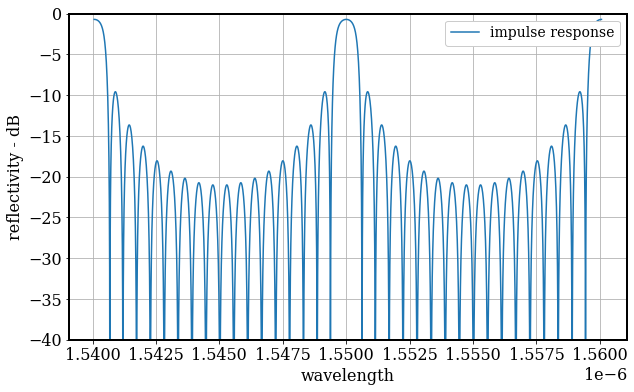

In [103]:
figure = plt.figure(figsize=(10,6))
plt.rc('font', **font)
plt.rc('axes', linewidth=2)
plt.plot(wavelength, gain_ona_2, label = 'impulse response')
plt.grid(True)
plt.xlabel('wavelength')
plt.ylabel('reflectivity - dB')
plt.ylim([-40, 0])
plt.legend(loc = 'upper right', framealpha = 1, fontsize = 14)

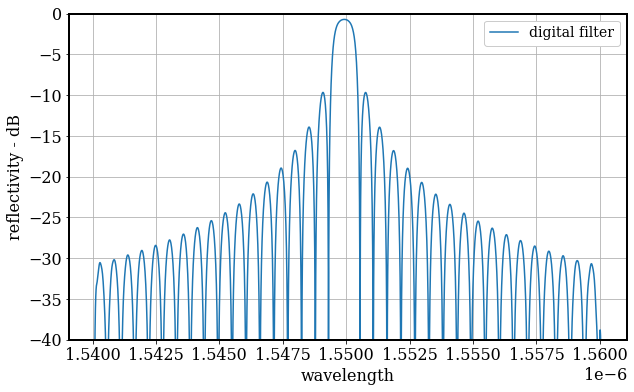

In [83]:
figure = plt.figure(figsize=(10,6))
plt.rc('font', **font)
plt.rc('axes', linewidth=2)
plt.plot(wavelength, gain_ona_3, label = 'digital filter')
plt.grid(True)
plt.xlabel('wavelength')
plt.ylabel('reflectivity - dB')
plt.ylim([-40, 0])
plt.legend(loc = 'upper right', framealpha = 1, fontsize = 14)

## increasing the bandwidth of the impulse response to 60 nm

In [85]:
inter.switchtolayout()
inter.run()

In [106]:
result_ona_2_40 = inter.getresult('ONA_2','input 1/mode 1/gain')
wavelength_ona_2_40 = result_ona_2_40['wavelength']
gain_ona_2_40 = result_ona_2_40['TE gain (dB)']

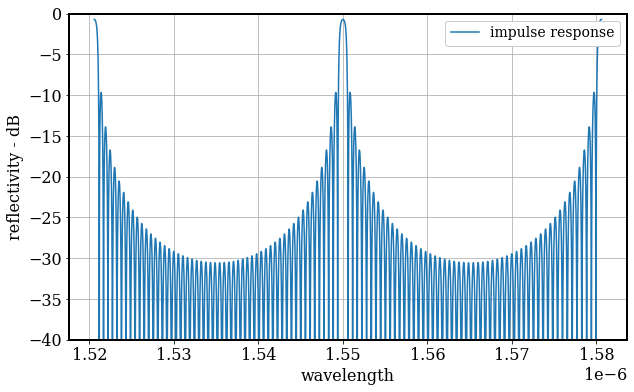

In [107]:
figure = plt.figure(figsize=(10,6))
plt.rc('font', **font)
plt.rc('axes', linewidth=2)
plt.plot(wavelength_ona_2_40, gain_ona_2_40, label = 'impulse response')
plt.grid(True)
plt.xlabel('wavelength')
plt.ylabel('reflectivity - dB')
plt.ylim([-40, 0])
plt.legend(loc = 'upper right', framealpha = 1, fontsize = 14)

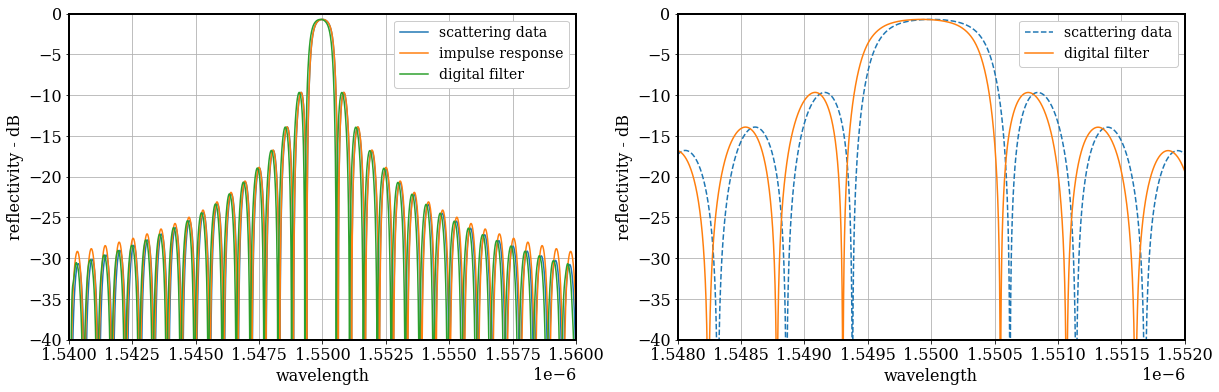

In [88]:
figure, ax = plt.subplots(1,2,figsize=(20,6))
plt.rc('font', **font)
plt.rc('axes', linewidth=2)

ax[0].plot(wavelength, gain_ona_1, label = 'scattering data')
ax[0].plot(wavelength_ona_2_40, gain_ona_2_40, label = 'impulse response')
ax[0].plot(wavelength, gain_ona_3, label = 'digital filter')
ax[0].grid(True)
ax[0].set_xlabel('wavelength')
ax[0].set_ylabel('reflectivity - dB')
ax[0].set_ylim([-40, 0])
ax[0].set_xlim([1540e-9, 1560e-9])
ax[0].legend(loc = 'upper right', framealpha = 1, fontsize = 14)

ax[1].plot(wavelength, gain_ona_1,'--', label = 'scattering data')
#ax[1].plot(wavelength_ona_2_40, gain_ona_2_40, label = 'impulse response')
ax[1].plot(wavelength, gain_ona_3, label = 'digital filter')
ax[1].grid(True)
ax[1].set_xlabel('wavelength')
ax[1].set_ylabel('reflectivity - dB')
ax[1].set_ylim([-40, 0])
ax[1].set_xlim([1548e-9, 1552e-9])
ax[1].legend(loc = 'upper right', framealpha = 1, fontsize = 14)

## INCREASING THE ORDER OF THE DIGITAL FILTER

In [3]:
inter.run()

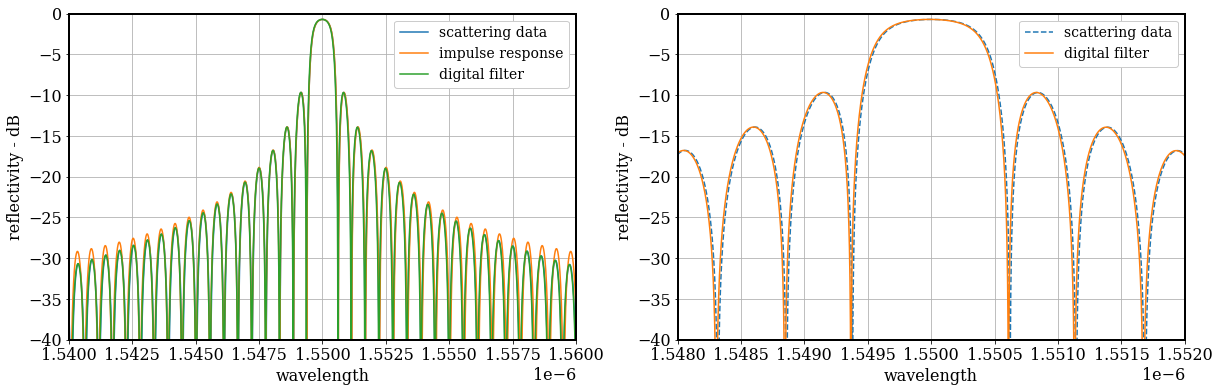

In [17]:
result_ona_1 = inter.getresult('ONA_1','input 1/mode 1/gain')
result_ona_2 = inter.getresult('ONA_2','input 1/mode 1/gain')
result_ona_3 = inter.getresult('ONA_3','input 1/mode 1/gain')
wavelength = result_ona_1['wavelength']
gain_ona_1 = result_ona_1['TE gain (dB)']
gain_ona_2 = result_ona_2['TE gain (dB)']
gain_ona_3 = result_ona_3['TE gain (dB)']

figure, ax = plt.subplots(1,2,figsize=(20,6))
plt.rc('font', **font)
plt.rc('axes', linewidth=2)

ax[0].plot(wavelength, gain_ona_1, label = 'scattering data')
ax[0].plot(wavelength, gain_ona_2, label = 'impulse response')
ax[0].plot(wavelength, gain_ona_3, label = 'digital filter')
ax[0].grid(True)
ax[0].set_xlabel('wavelength')
ax[0].set_ylabel('reflectivity - dB')
ax[0].set_ylim([-40, 0])
ax[0].set_xlim([1540e-9, 1560e-9])
ax[0].legend(loc = 'upper right', framealpha = 1, fontsize = 14)

ax[1].plot(wavelength, gain_ona_1,'--', label = 'scattering data')
#ax[1].plot(wavelength, gain_ona_2, label = 'impulse response')
ax[1].plot(wavelength, gain_ona_3, label = 'digital filter')
ax[1].grid(True)
ax[1].set_xlabel('wavelength')
ax[1].set_ylabel('reflectivity - dB')
ax[1].set_ylim([-40, 0])
ax[1].set_xlim([1548e-9, 1552e-9])
ax[1].legend(loc = 'upper right', framealpha = 1, fontsize = 14)
